In [1]:
#import all necessary -and maybe unnecessary too but we're not trying to risk it- libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
import statistics
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams.update({'font.size': 22})
import sys

In [2]:
#In this script I attempt to replicate cross sections created by Arcmap tool 3D Analyst-Point Profile and 3D Analyst-Interpolate line-Profile Graph
#The creation of said cross sections require a DEM file for the profile graph and a point dataset with z atributes for the point profile graph obtained by treating the DEM and point datasets through the Interpolate Shape (3D Analyst) tool.
#This cross sections can only be exported to the working layout as an item thus I exported the values of the plots as a .txt file through the options in the 3D Analyst toolbar:
#Customize-Toolbars-3D Analyst-Options-location to save profile data-right click on profile graph-Export-Data-Format Text-Options-Delimiter-Tab-Save



In [228]:
#We start loading and previewing our .txt data 

#set name will be added later, right now I'm working on a test file only

path = '../../../data/'
timeperiod = 'nov18'
cs = 'cc'
informat = '.txt'
proffile = path + timeperiod +  '_' + cs + '_profile' + informat
hypofile = path + timeperiod +  '_' + cs + '_hypo' + informat



profdata = pd.read_csv( proffile, sep='\t')
hypodata = pd.read_csv( hypofile, sep='\t')


profdata.head()

,X,Graphic Profile 1
0,0.000000,15.65
1,0.007883,15.65
2,0.015766,15.65
3,0.023649,15.65
4,0.031532,15.65


In [229]:
#modifying hypocenters data to set depth as a negative value

hypodata['Point Profile'] = (hypodata['Point Profile'])*-1
profdata['Graphic Profile 1'] = (profdata['Graphic Profile 1'])*-1

profdata.head()
hypodata.head()

,X,Point Profile
0,1.334988,-7.0
1,1.334988,-7.0
2,1.109556,-24.0
3,1.097317,-23.5
4,1.068164,-4.8


In [230]:
#defining x and y data for both plots 

hypodis = hypodata['X']
hypodep = hypodata['Point Profile']
profdis = profdata['X']
profdep = profdata['Graphic Profile 1']

#verify all lists contain the same amount of elements

print((len(hypodis)), (len(hypodep)), (len(profdis)), (len(profdep)))

30 30 191 191


Text(0, 0.5, 'Profundidad (msnm)')

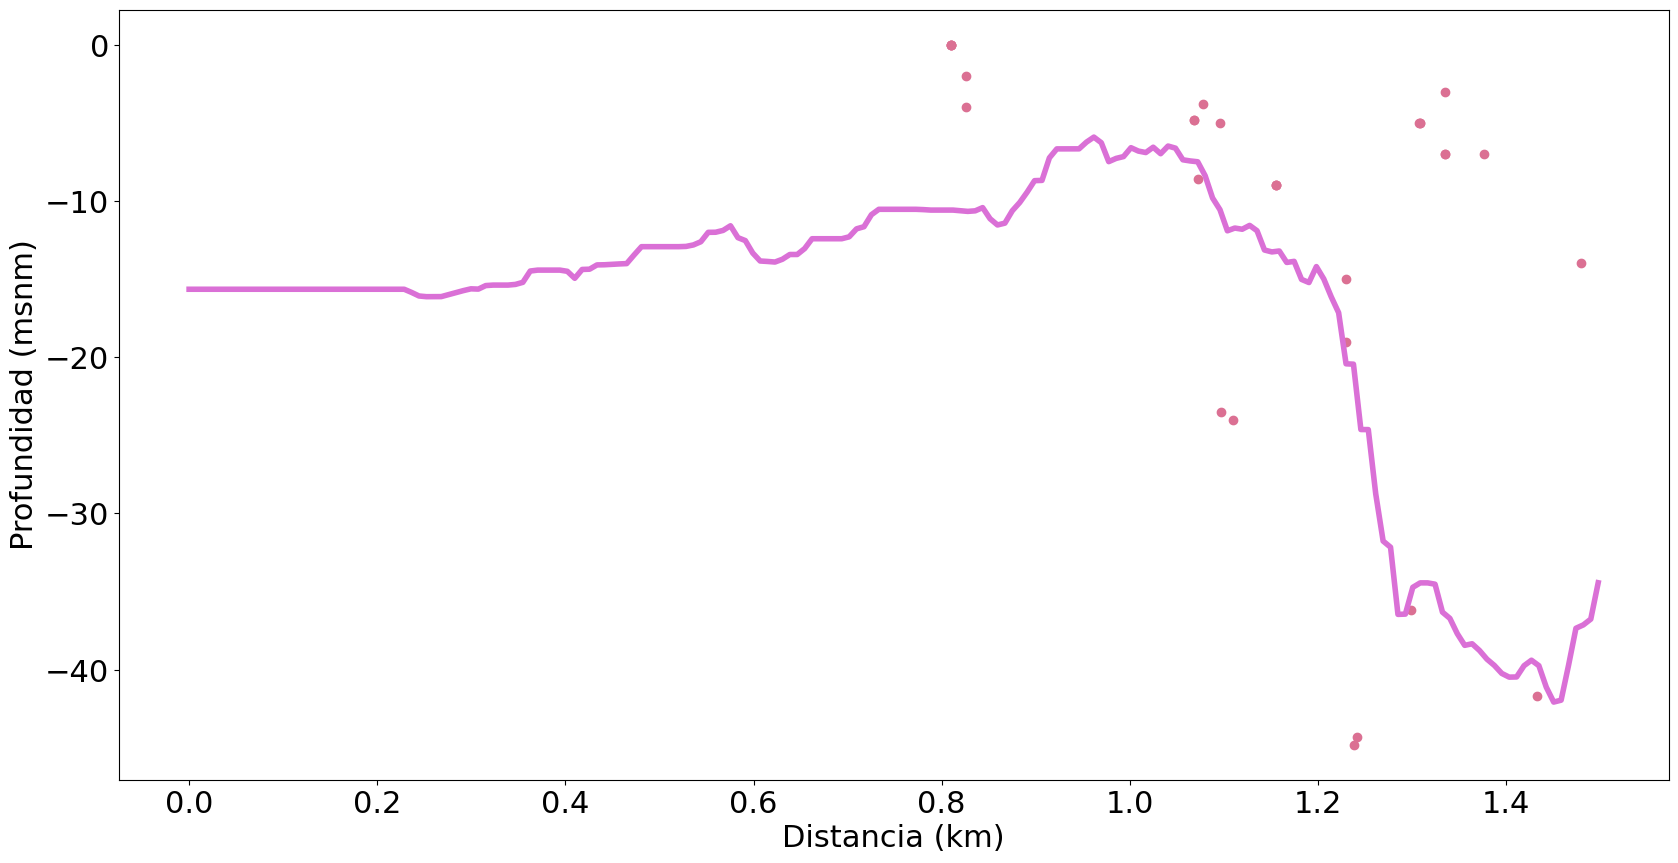

In [231]:
#setup and create line plot

fig, ax = plt.subplots(figsize=(20,10))


#plot bathymetry as a line plot

plt.plot(profdis, profdep, color='orchid', linewidth=4.0)


#plot hypocenters as a scatter plot

plt.scatter(hypodis, hypodep, color='palevioletred')

#add labels for axes: depth vs distance along cross section

plt.xlabel('Distancia (km)')
plt.ylabel('Profundidad (msnm)')

#show labels
#plt.legend()

#Just to remind us what we're doing, setting up a title:

#plt.title('Distribución de las detecciones a lo largo de la sección A-A\'')

#show labels
#plt.legend()

In [232]:
#Sick and tired of modifying and uncommenting titles so 
if timeperiod == 'alltime':
    pe = 'el periodo de estudio'
else: 
    pe1 = 'el mes de '
    if timeperiod == 'nov17':
        pe2 = 'Noviembre de 2017'
    elif timeperiod == 'dec17':
        pe2 = 'Diciembre de 2017'
    elif timeperiod == 'jan18':
        pe2 = 'Enero de 2018'
    elif timeperiod == 'feb18':
        pe2 = 'Febrero de 2018'
    elif timeperiod == 'mar18':
        pe2 = 'Marzo de 2018'
    elif timeperiod == 'apr18':
        pe2 = 'Abril de 2018'
    elif timeperiod == 'may18':
        pe2 = 'Mayo de 2018'
    elif timeperiod == 'jun18':
        pe2 = 'Junio de 2018'
    elif timeperiod == 'jul18':
        pe2 = 'Julio de 2018'
    elif timeperiod == 'aug18':
        pe2 = 'Agosto de 2018'
    elif timeperiod == 'sep18':
        pe2 = 'Septiembre de 2018'
    elif timeperiod == 'oct18':
        pe2 = 'Octubre de 2018'
    elif timeperiod == 'nov18':
        pe2 = 'Noviembre de 2018'
    pe = pe1 + pe2

if cs == 'aa':
    crosssection = 'A-A\''
elif cs == 'bb':
    crosssection = 'B-B\''
elif cs == 'cc':
    crosssection = 'C-C\''



tl = 'Distribución de las detecciones durante ' + pe + ' a lo largo de la sección ' + crosssection


Text(0.5, 1.0, "Distribución de las detecciones durante el mes de Noviembre de 2018 a lo largo de la sección C-C'")

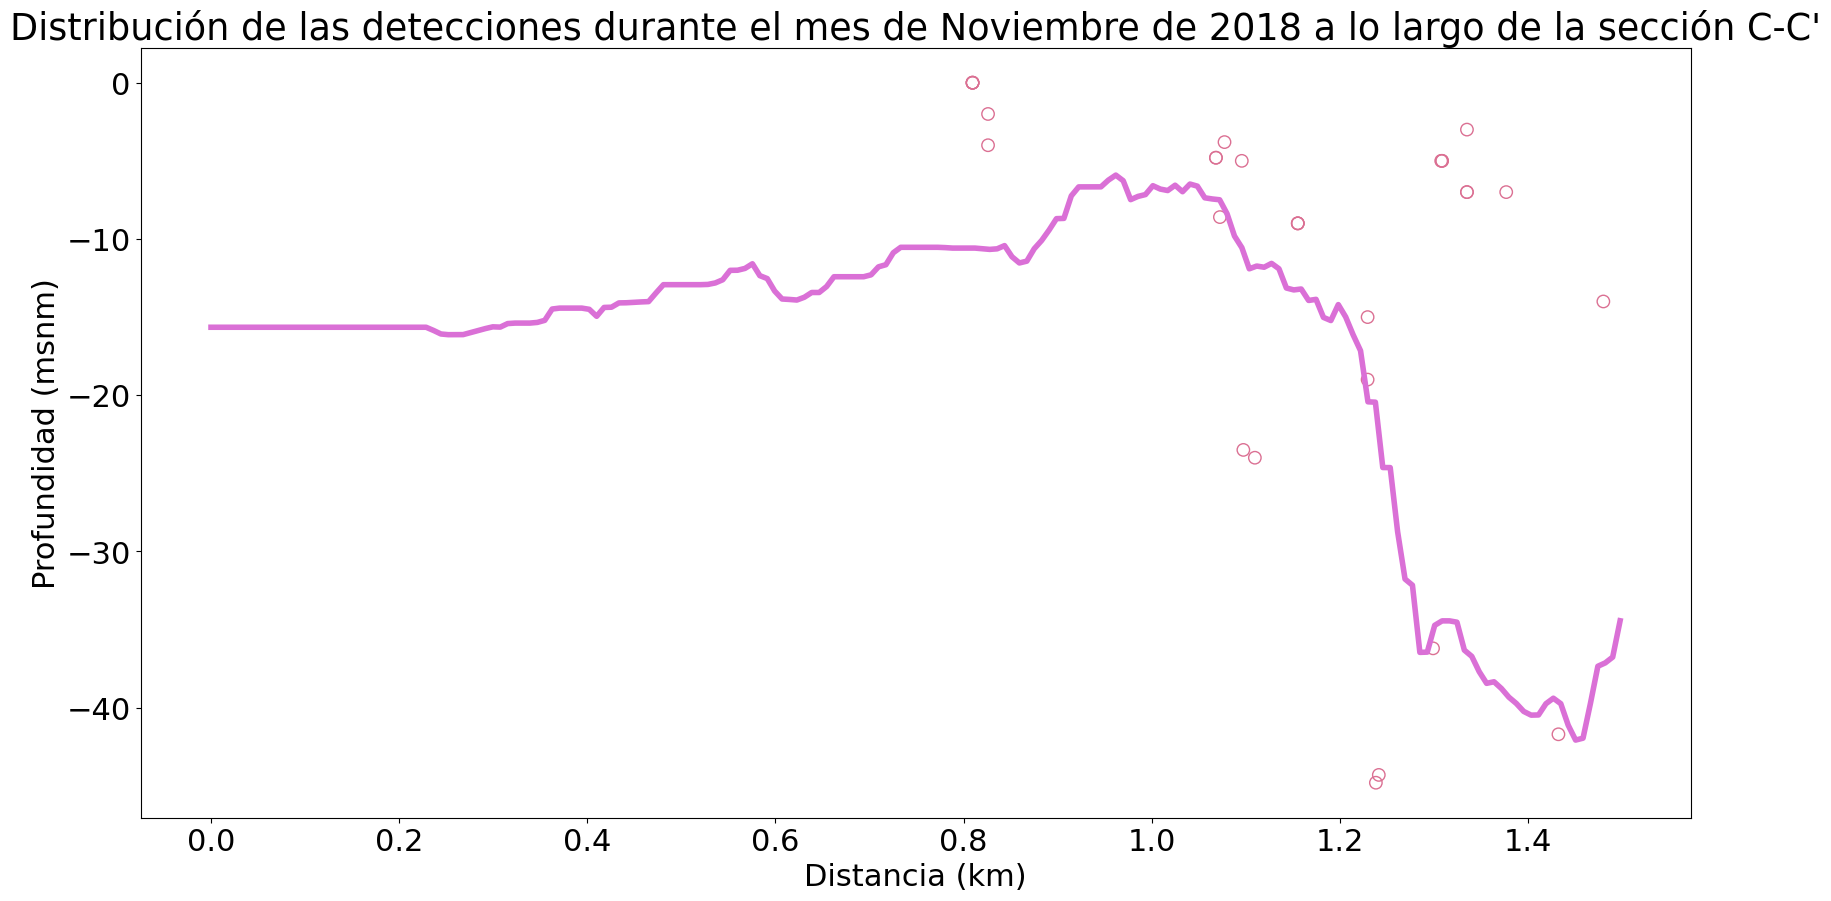

In [233]:
#setup and create line plot

fig, ax = plt.subplots(figsize=(20,10))


#plot bathymetry as a line plot

plt.plot(profdis, profdep, color='orchid', linewidth=4.0)


#plot hypocenters as a scatter plot

plt.scatter(hypodis, hypodep, s=80, facecolors='None', edgecolors='palevioletred' )

#add labels for axes: depth vs distance along cross section

plt.xlabel('Distancia (km)')
plt.ylabel('Profundidad (msnm)')

#show labels
#plt.legend()

plt.title(tl)

#show labels
#plt.legend()